In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize


## Do a  simple least squares fit using scipy and numpy ##

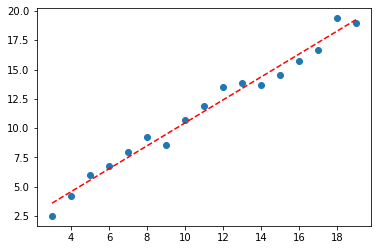

gradient m = 0.98+/-0.04 zeropoint c = 0.66+/-0.44


In [19]:
def func(x,m,c):
    return (m*x+c)

xdata=np.arange(3.0,20.0,1.0)
ydata=2.0*np.random.rand(len(xdata))-0.5+xdata

popt,pcov=optimize.curve_fit(func,xdata,ydata)

yfit=[]
for value in xdata:
    yfit.append(value*popt[0]+popt[1])
    
plt.scatter (xdata,ydata)
plt.plot(xdata,yfit,'r--')
plt.show()

perr = np.sqrt(np.diag(pcov))

print ('gradient m = {0:4.2f}+/-{1:4.2f} zeropoint c = {2:4.2f}+/-{3:4.2f}'.format(popt[0],perr[0],popt[1],perr[1]))

## Use scipy minimise routines to find function

Converged at  6
Converged at  23


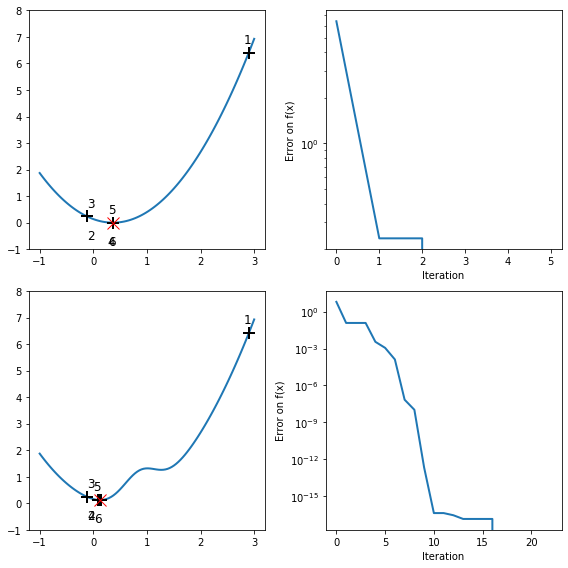

In [20]:
x = np.linspace(-1, 3, 100)
x_0 = np.exp(-1)

def f(x):
    return (x - x_0)**2 + epsilon*np.exp(-5*(x - .5 - x_0)**2)

plt.figure(figsize=(8,8))
window=220

for epsilon in (0, 1):
    window=window+1
    plt.subplot(window)
    plt.ylim(-1.0,8.0)
    
    # A convex function
    plt.plot(x, f(x), linewidth=2)

    # Apply brent method. To have access to the iteration, do this in an
    # artificial way: allow the algorithm to iter only once
    all_x = list()
    all_y = list()
    
    for iter in range(30):
        result = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Brent",
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)
        if result.success:
            print('Converged at ', iter)
            break

        this_x = result.x
        all_x.append(this_x)
        all_y.append(f(this_x))
        if iter < 6:
            plt.text(this_x - .05*np.sign(this_x) - .05,
                    f(this_x) + 1.2*(.3 - iter % 2), iter + 1,
                    size=12)

    plt.plot(all_x[:10], all_y[:10], 'k+', markersize=12, markeredgewidth=2)
    plt.plot(all_x[-1], all_y[-1], 'rx', markersize=12)


    window=window+1
    plt.subplot(window)
    plt.semilogy(np.abs(all_y - all_y[-1]), linewidth=2)
    plt.ylabel('Error on f(x)')
    plt.xlabel('Iteration')
    plt.tight_layout()

plt.show()

## Use astropy to generate and display fake stellar image, write and read csv file

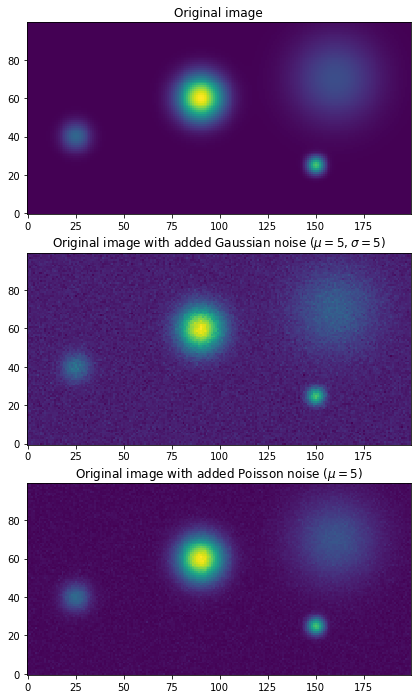

amplitude x_0 y_0 sigma
--------- --- --- -----
       50 160  70  15.2
       70  25  40   5.1
      150 150  25   3.0
      210  90  60   8.1
amplitude x_0 y_0 sigma
--------- --- --- -----
       50 160  70  15.2
       70  25  40   5.1
      150 150  25   3.0
      210  90  60   8.1


In [21]:
from astropy.table import Table
from astropy.io import ascii
#defoine positions and fwhm of sources
table = Table()
table['amplitude'] = [50, 70, 150, 210]
table['x_0'] = [160, 25, 150, 90]
table['y_0'] = [70, 40, 25, 60]
table['sigma'] = [15.2, 5.1, 3., 8.1]

# make an image of the sources without noise, with Gaussian
# noise, and with Poisson noise
from photutils.datasets import make_gaussian_prf_sources_image
from photutils.datasets import make_noise_image
shape = (100, 200)
image1 = make_gaussian_prf_sources_image(shape, table)
image2 = (image1 + make_noise_image(shape, distribution='gaussian',
                                    mean=5., stddev=5.))
image3 =  (image1 + make_noise_image(shape, distribution='poisson',
                                     mean=5.))

# plot the images
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
ax1.imshow(image1, origin='lower', interpolation='nearest')
ax1.set_title('Original image')
ax2.imshow(image2, origin='lower', interpolation='nearest')
ax2.set_title('Original image with added Gaussian noise'
              ' ($\mu = 5, \sigma = 5$)')
ax3.imshow(image3, origin='lower', interpolation='nearest')
ax3.set_title('Original image with added Poisson noise ($\mu = 5$)')
plt.show()

#Test writing and readinf csv files
print (table)
ascii.write (table,'test.csv',format='csv',overwrite=True)
Back_in=ascii.read('test.csv')
print (Back_in)

In [49]:
from scipy.ndimage import gaussian_filter

# Create empty image
nx, ny = 512, 512
image = np.zeros((ny, nx))
print (image)

# Set number of stars
n = 100

# Generate random positions
r = np.random.random(n) * nx
theta = np.random.uniform(0., 2. * np.pi, n)

# Generate random fluxes
fluxes = np.random.random(n) ** 2
print (f)

# Compute position
x = nx / 2.0 + r * np.cos(theta)
y = ny / 2.0 + r * np.sin(theta)
print (x)

# Add stars to image
# ==> First for loop and if statement <==
for i in np.linspace(0,n-1,n,dtype=int):
    print (i)
    if x[i] >= 0 and x[i] < nx and y[i] >= 0 and y[i] < ny:
        image([y[i]], [x[i]]) += fluxes[i]
    print (done)
# # Convolve with a gaussian
# image = gaussian_filter(image, 1)

# # Add noise
# image += np.random.normal(3., 0.01, image.shape)

# plt.figure(figsize=(5,5))
# plt.imshow(image,origin='lower', interpolation='nearest')
# plt.show()



SyntaxError: can't assign to function call (<ipython-input-49-d85fa623c484>, line 29)